In [483]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
import geopandas 
from geopandas  import GeoDataFrame
from shapely.geometry import Point,Polygon
import plotly.express as px 




In [484]:
#I read the csv file of all chicago schools selecting only information columns we need using usecols
df=pd.read_csv("chicago_Public_Schools.csv",usecols=["Elementary, Middle, or High School","City","State","COMMUNITY_AREA_NAME","ZIP Code","Latitude","Longitude","Location"])


In [485]:
# we check our data below 
df.tail(2)

,"Elementary, Middle, or High School",City,State,ZIP Code,Latitude,Longitude,COMMUNITY_AREA_NAME,Location
564,ES,Chicago,IL,60637,41.77340,-87.594356,WOODLAWN,"(41.77339962, -87.59435584)"
565,HS,Chicago,IL,60623,41.83602,-87.734195,SOUTH LAWNDALE,"(41.83601953, -87.73419465)"


In [486]:
df.shape

(566, 8)

In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elementary, Middle, or High School  566 non-null    object 
 1   City                                566 non-null    object 
 2   State                               566 non-null    object 
 3   ZIP Code                            566 non-null    int64  
 4   Latitude                            566 non-null    float64
 5   Longitude                           566 non-null    float64
 6   COMMUNITY_AREA_NAME                 566 non-null    object 
 7   Location                            566 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 35.5+ KB


In [488]:
#we create geometries
geometry=gpd.points_from_xy(df.Longitude,df.Latitude)

In [489]:
#we create a geopandas dataframe
gpd_df=gpd.GeoDataFrame(df[["Elementary, Middle, or High School","City","State","ZIP Code","Latitude","Longitude","COMMUNITY_AREA_NAME","Location"]],geometry=geometry)

In [490]:
# we create a world map 
world=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


Text(0.5, 1.0, 'SCHOOL CATEGORIES IN CHICAGO')

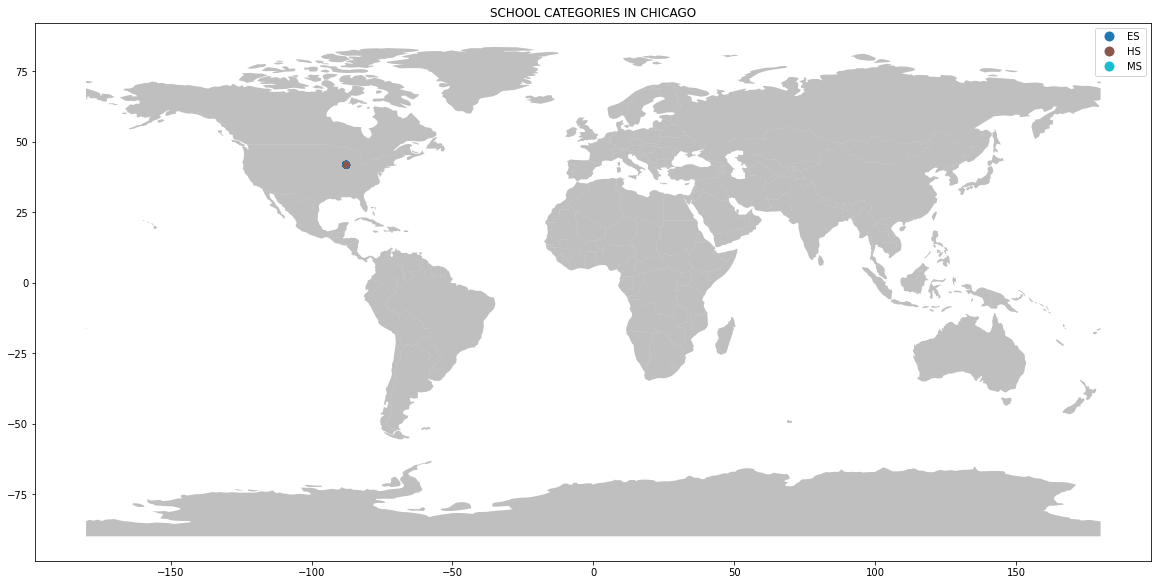

In [492]:
# we plot 
fig, ax = plt.subplots(figsize=(20, 30))
world.plot(ax=ax, alpha=0.5, color="GREY",linewidth=2)
gpd_df.plot(column="Elementary, Middle, or High School", ax=ax, legend=True)
plt.title("SCHOOL CATEGORIES IN CHICAGO")

In [436]:
# check out our geo data frame data 
gpd_df.head(3)

,NAME_OF_SCHOOL,City,State,ZIP Code,Latitude,Longitude,COMMUNITY_AREA_NAME,Location,geometry
0,Abraham Lincoln Elementary School,Chicago,IL,60614,41.924497,-87.644522,LINCOLN PARK,"(41.92449696, -87.64452163)",POINT (-87.64452 41.92450)
1,Adam Clayton Powell Paideia Community Academy ...,Chicago,IL,60649,41.760324,-87.556736,SOUTH SHORE,"(41.76032435, -87.55673627)",POINT (-87.55674 41.76032)
2,Adlai E Stevenson Elementary School,Chicago,IL,60652,41.747111,-87.731702,ASHBURN,"(41.74711093, -87.73170248)",POINT (-87.73170 41.74711)


In [263]:
columns={"Misconduct_percentge_rate":"Rate of Misconducts (per 100 students)"}
df.rename(columns)
df.columns

Index(['School ID', 'NAME_OF_SCHOOL', 'Elementary, Middle, or High School',
       'Street Address', 'City', 'State', 'ZIP Code', 'Phone Number', 'Link ',
       'Network Manager', 'Collaborative Name',
       'Adequate Yearly Progress Made? ', 'Track Schedule',
       'CPS Performance Policy Status', 'CPS Performance Policy Level',
       'HEALTHY_SCHOOL_CERTIFIED', 'Safety Icon ', 'SAFETY_SCORE',
       'Family Involvement Icon', 'Family Involvement Score',
       'Environment Icon ', 'Environment Score', 'Instruction Icon ',
       'Instruction Score', 'Leaders Icon ', 'Leaders Score ',
       'Teachers Icon ', 'Teachers Score', 'Parent Engagement Icon ',
       'Parent Engagement Score', 'Parent Environment Icon',
       'Parent Environment Score', 'AVERAGE_STUDENT_ATTENDANCE',
       'Rate of Misconducts (per 100 students) ', 'Average Teacher Attendance',
       'Individualized Education Program Compliance Rate ', 'Pk-2 Literacy %',
       'Pk-2 Math %', 'Gr3-5 Grade Level Math %'

In [257]:
# to have an idea of what we are dealing with 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 78 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   School ID                                          566 non-null    int64  
 1   NAME_OF_SCHOOL                                     566 non-null    object 
 2   Elementary, Middle, or High School                 566 non-null    object 
 3   Street Address                                     566 non-null    object 
 4   City                                               566 non-null    object 
 5   State                                              566 non-null    object 
 6   ZIP Code                                           566 non-null    int64  
 7   Phone Number                                       566 non-null    object 
 8   Link                                               565 non-null    object 
 9   Network Ma

In [155]:
# I create a variable to handle a dataframe grouping by the school initials 'highschool, Elementary and Ms'
x=df.groupby("Elementary, Middle, or High School").sum()

In [236]:
x

,School ID,ZIP Code,SAFETY_SCORE,Environment Score,Instruction Score,Rate of Misconducts (per 100 students),ISAT Exceeding Math %,ISAT Exceeding Reading %,ISAT Value Add Math,ISAT Value Add Read,COLLEGE_ENROLLMENT,General Services Route,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,Ward,Police District
"Elementary, Middle, or High School",,,,,,,,,,,,,,,,,,,
ES,281852825,28011122,20650.0,20236.0,20599.0,10401.8,9042.0,7050.8,54.1,25.1,258943,18136,5.374145e+08,8.707969e+08,19329.909537,-40506.563360,17644,10332,5417
HS,56514565,5638446,4218.0,3886.0,3767.0,1450.5,472.0,302.3,-13.2,-9.0,90130,3585,1.080847e+08,1.756072e+08,3891.957519,-8154.261586,3345,1922,1081
MS,6712504,666858,528.0,382.0,406.0,82.3,175.6,104.4,-8.8,-5.5,5273,401,1.276780e+07,2.088118e+07,460.642486,-964.539631,353,232,130


In [237]:
# This shows us the total safety_scores of each school level
Total_school_safety=x["SAFETY_SCORE"]
Total_school_safety


Elementary, Middle, or High School
ES    20650.0
HS     4218.0
MS      528.0
Name: SAFETY_SCORE, dtype: float64

In [273]:
#Total number of those that end up in a ward from the specific school levels 
Number_In_Ward=x["Ward"]
Number_In_Ward


Elementary, Middle, or High School
ES    10332
HS     1922
MS      232
Name: Ward, dtype: int64

In [197]:
# With this data we can see how many get enrolled into college from each of the school levels
College_enrollment_Levels=x["COLLEGE_ENROLLMENT"]
College_enrollment_Levels


Elementary, Middle, or High School
ES    258943
HS     90130
MS      5273
Name: COLLEGE_ENROLLMENT, dtype: int64

In [209]:
Community_Area_Numbers=x["COMMUNITY_AREA_NUMBER"]
Community_Area_Numbers


Elementary, Middle, or High School
ES    17644
HS     3345
MS      353
Name: COMMUNITY_AREA_NUMBER, dtype: int64

<AxesSubplot:title={'center':'College Enrollment Level'}, xlabel='Elementary, Middle, or High School'>

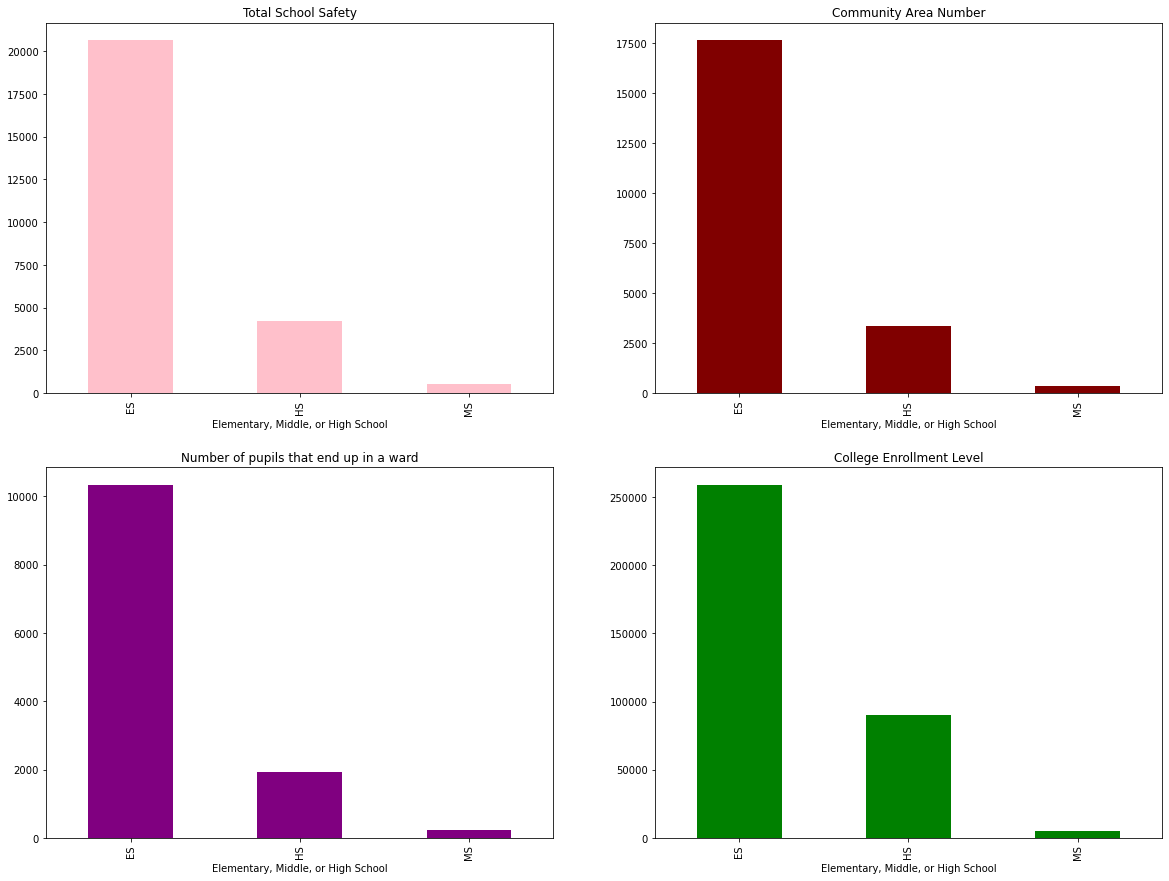

In [275]:
# I BEGIN BY CREATING A VARIABLE NAMED FIG WHERE I PLOT MY FIGURE AND ASSIGN IN XRISTICS
fig=plt.figure(figsize=(20,15))
#I add a subplot to the figure using the add_subplot and specifing the plot sizes
ax=fig.add_subplot(221)
# I start ploting my plots and specifing xristics 
Total_school_safety.plot(kind="bar",color="pink",title="Total School Safety")
ax=fig.add_subplot(222)
# I start ploting my plots and specifing xristics
Community_Area_Numbers.plot(kind="bar",color="maroon",title="Community Area Number")
ax=fig.add_subplot(223)
# I start ploting my plots and specifing xristics
Number_In_Ward.plot(kind="bar",color="purple",title="Number of pupils that end up in a ward")
ax=fig.add_subplot(224)
# I start ploting my plots and specifing xristics
College_enrollment_Levels.plot(kind="bar",color="green",title="College Enrollment Level")





In [407]:
data=pd.read_csv("chicago_Public_Schools.csv",usecols=["COMMUNITY_AREA_NAME","City"])

In [408]:
data.head(2)

,City,COMMUNITY_AREA_NAME
0,Chicago,LINCOLN PARK
1,Chicago,SOUTH SHORE


In [410]:
data

,City,COMMUNITY_AREA_NAME
0,Chicago,LINCOLN PARK
1,Chicago,SOUTH SHORE
2,Chicago,ASHBURN
3,Chicago,NEW CITY
4,Chicago,ARMOUR SQUARE
...,...,...
561,Chicago,NEW CITY
562,Chicago,WASHINGTON PARK
563,Chicago,LOGAN SQUARE
564,Chicago,WOODLAWN


In [411]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   City                 566 non-null    object
 1   COMMUNITY_AREA_NAME  566 non-null    object
dtypes: object(2)
memory usage: 9.0+ KB


In [412]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
world


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)
...,...,...
238,Rio de Janeiro,POINT (-43.21212 -22.90731)
239,São Paulo,POINT (-46.62697 -23.55673)
240,Sydney,POINT (151.21255 -33.87137)
241,Singapore,POINT (103.85387 1.29498)


In [413]:
cities=world.join(data)

In [414]:
#joining the world data to our csv data 
cities

,name,geometry,City,COMMUNITY_AREA_NAME
0,Vatican City,POINT (12.45339 41.90328),Chicago,LINCOLN PARK
1,San Marino,POINT (12.44177 43.93610),Chicago,SOUTH SHORE
2,Vaduz,POINT (9.51667 47.13372),Chicago,ASHBURN
3,Lobamba,POINT (31.20000 -26.46667),Chicago,NEW CITY
4,Luxembourg,POINT (6.13000 49.61166),Chicago,ARMOUR SQUARE
...,...,...,...,...
238,Rio de Janeiro,POINT (-43.21212 -22.90731),Chicago,SOUTH SHORE
239,São Paulo,POINT (-46.62697 -23.55673),Chicago,OAKLAND
240,Sydney,POINT (151.21255 -33.87137),Chicago,EAST GARFIELD PARK
241,Singapore,POINT (103.85387 1.29498),Chicago,PORTAGE PARK


In [415]:
cities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 243 non-null    object  
 1   geometry             243 non-null    geometry
 2   City                 243 non-null    object  
 3   COMMUNITY_AREA_NAME  243 non-null    object  
dtypes: geometry(1), object(3)
memory usage: 7.7+ KB
